# Classification of Highly Valued Stats and Metrics Between Drafted and Non-Drafted NCAA Basketball Players

### Liam Shen, Vidyut Ramanan, Jasmine Duong, John Mehlenbacher

## Abstract

The NBA draft is often an unknown gamble, as players drafted high sometimes fail, and players drafted low sometimes succeed. Hundreds, if not thousands, of college basketball years declare for the draft, with only 60 players hearing their name called on draft night. Each player is different, with different playstyles, and with varying amounts of success within college. This project aims to categorize college success and identify the stats or metrics that are most important for a college basketball player with dreams of  getting drafted into the NBA. 

## Introduction 

The NBA draft is often a shot in the dark based on the stats and  metrics of college basketball players that stand out above others. This may be points scored per game, or assists given out pre game, but many players often specialize in one category of stats/metrics, each with different ways of playing the game of basketball.

### Problem
However, there have been notable college superstars that were drafted very high, who became failures in the NBA, while there have also been undrafted players, with very few stats that stood out, that have become fantastic basketball players.  The most basic of stats that are measured are often pts, ast, and treb, which signify the points, assists, and rebound per game[3]. Furthermore, players may have different roles and playstyles within a team, so one stat must  be valued above another. 

The issue with these stats is that it doesn’t take into account the effect the player has relative to the game. Underlying metrics such as PER, and BPM may have a bigger impact on a player being drafted or not, when compared to aforementioned stats.[5] And despite this, player’s each year with outstanding metrics still fail in the NBA, leading us to the problem: what stats or metrics are the most important for college players wanting to be drafted?

### Motivation & Objectives
While we had varying degrees of knowledge of each sport, we all agreed that sports can be a gold mine for data science. Sports are great for data because every single second is measured and recorded for every single player in every game.  Our goal is accurately categorize the stats and metrics that have the most value in the probability of getting drafted. With such extensive data resources readily available, we have the tools to analyze college statistics for individual players to find the strongest measure of performance. 

Our objective is to clean the NCAA dataset to accurately identify trends.. We want further level the playing field to college athletes looking to take their career to the next level that may not have conventionally high statistics. 

## Loading in the data

Our dataset was obtained from Kaggle in the form of a csv file. This data was originally collected on Basketball Reference and organized by a Kaggle user, and we decided to further clean and analyze that dataset since it was a large dataset containing all college NCAA basketball players and their stats from 2009 – 2021.

First we must load in and examine our data. We do so using the desribe method, head method, and info method.  

In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
#loading in the csv 
data = pd.read_csv("2009_2021Basketball.csv")

/var/folders/pj/dgm8krdj5bd42dmfqxcjj7200000gp/T/ipykernel_34610/802242054.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("2009_2021Basketball.csv")


In [3]:
#examine the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      61061 non-null  object 
 1   team                             61061 non-null  object 
 2   conf                             61061 non-null  object 
 3   GP                               61061 non-null  int64  
 4   Min_per                          61061 non-null  float64
 5   Ortg                             61061 non-null  float64
 6   usg                              61061 non-null  float64
 7   eFG                              61061 non-null  float64
 8   TS_per                           61061 non-null  float64
 9   ORB_per                          61061 non-null  float64
 10  DRB_per                          61061 non-null  float64
 11  AST_per                          61061 non-null  float64
 12  TO_per            

In [4]:
data.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 65
count,61061.000000,61061.00000,61061.000000,61061.000000,61061.000000,61061.000000,61061.00000,61061.000000,61061.000000,61061.000000,...,61016.000000,61016.000000,61023.000000,61023.000000,61023.000000,61023.000000,61023.000000,61023.000000,61023.000000,61016.000000
mean,22.797760,37.12839,91.666396,18.126341,44.500768,47.584212,5.54225,12.704242,10.808699,20.225856,...,-2.088743,-0.449119,0.764618,1.897561,2.662179,1.072777,0.529446,0.280996,5.773579,5.384933
std,10.166805,28.05805,30.963736,6.253742,18.431761,17.640613,9.30561,10.755123,9.362704,12.318765,...,6.237674,3.336297,0.734824,1.483689,2.097767,1.169677,0.469614,0.414885,4.947872,5.581653
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,9.30000,83.900000,14.500000,40.000000,43.800000,1.80000,8.400000,4.600000,14.700000,...,-4.426910,-1.737988,0.222200,0.703200,1.000000,0.222200,0.157900,0.000000,1.571400,0.326832
50%,27.000000,35.60000,97.100000,18.100000,47.700000,50.850000,4.30000,11.900000,9.000000,19.100000,...,-1.578180,-0.320310,0.538500,1.636400,2.260900,0.677400,0.424200,0.133300,4.483900,4.609915
75%,31.000000,62.00000,106.900000,21.800000,53.300000,56.110000,8.10000,16.100000,15.000000,24.400000,...,0.999816,1.064795,1.103400,2.771400,3.828600,1.533300,0.794100,0.363600,9.064500,8.500773
max,41.000000,98.00000,834.000000,50.000000,150.000000,150.000000,1576.60000,1385.000000,100.000000,100.000000,...,225.485000,78.985500,5.933300,11.545500,15.000000,10.000000,4.000000,5.258100,30.090900,127.274000


In [5]:
# looking at duplicate players 
data['player_name'].describe()

count               61061
unique              25719
top       Austin Williams
freq                   15
Name: player_name, dtype: object

In [6]:
#example of duplicate player
data[data['player_name'] == 'Austin Williams'][['player_name', 'year','pick','team']]

,player_name,year,pick,team
30968,Austin Williams,2015,NaN,North Carolina A&T
30981,Austin Williams,2015,NaN,Drexel
34403,Austin Williams,2016,NaN,North Carolina A&T
34414,Austin Williams,2016,NaN,Drexel
38233,Austin Williams,2017,NaN,North Carolina A&T
38241,Austin Williams,2017,NaN,Drexel
40374,Austin Williams,2017,NaN,Yale
42317,Austin Williams,2018,NaN,North Carolina A&T
42322,Austin Williams,2018,NaN,Drexel
43850,Austin Williams,2018,NaN,Yale


In [7]:
data.head(30)

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
5,Nick Rodgers,Butler,Horz,6,0.7,0.0,0.0,0.0,0.00,0.0,...,3.744910,0.0000,0.3333,0.3333,0.3333,0.0000,0.0000,0.0000,NaN,0.00000
6,Dana Smith,Longwood,ind,27,77.8,104.8,23.0,53.4,56.30,6.8,...,-0.908391,2.1481,3.8889,6.0370,1.8148,1.7778,0.7407,15.2593,NaN,3.22107
7,Matt Beck,Fordham,A10,19,10.4,131.9,3.3,90.0,90.00,2.6,...,-2.086900,0.1579,0.1579,0.3158,0.1053,0.1053,0.0000,0.4737,NaN,2.50384
8,Justin Drummond,Wagner,NEC,30,82.8,99.7,20.5,48.8,53.07,2.9,...,0.919272,0.8000,3.9333,4.7333,4.1333,1.7333,0.8000,10.5000,NaN,3.42016
9,Jamal Smith,Wagner,NEC,30,80.4,92.5,23.0,43.5,45.29,6.4,...,-1.913070,1.7333,3.4667,5.2000,1.7333,1.2333,0.1000,11.8667,NaN,3.34007


The data appears to be good for the most part but there are some things that we must change. First there are some columns that we don't need so because the stats are either redundant or unnecessary. We will drop those columns below. There are many columns with data that are the object data type so we will have to cast them to the right data type. There are also some null or missing values for players. Since these don't make up a substantial portion of the dataset, we will drop them. We also found that there are many players with duplicate names. After looking in to the data we realized that this was because there were players with the same name and also because a player's stats across multiple years could be in the dataframe and each year would take up a row so one player could have more than one row. To solve this issue, we will consider a player a dupicate if they have the same name, year, team, and pick. We keep only the latest year. We have also decided to encode the pick as 0 if they were not drafted or 1 if they were drafted. Right now pick represents the position overall that they were drafted and is null if they were not drafted. Furthermore, to test the importance of metrics compared to on-court stats, we will add two essential metrics for player performance. The PER, or Player Efficiency Rating, is calculated using a linear formula derived from the league averages, and players with no minutes were automatically set to 0 as that meant they did not play. The netRtg, or net rating, is calculating by subtracting drtg from Ortg, hence calculating a player’s impact on both ends of the court, per 100 possessions

##  Data Cleaning 

In [8]:

#converting column types to appropriate types and dropping unneeded columns  
data = data.drop(columns = ['Unnamed: 64', 'Unnamed: 65', 'rimmade', 'rimmade+rimmiss', 'midmade', 'midmade+midmiss'])
data = data.drop(columns = ['num', 'Rec Rank', 'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade', 'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)'])
data = data.drop(columns = [])
data = data.convert_dtypes()
data = data.drop(columns = ['type', 'pid', 'adjoe', 'porpag', 'ht', 'Min_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'adrtg', 'dporpag', 'stops', 'gbpm', 'ogbpm', 'dgbpm'])
data['pts'] = data['pts'].astype('float64')
data['bpm'] = data['bpm'].astype('float64')
data['Ortg'] = data['Ortg'].astype('float64')
data['GP'] = data['GP'].astype('int64')
data['FTM'] = data['FTM'].astype('int64')
data['FTA'] = data['FTA'].astype('int64')
data['twoPM'] = data['twoPM'].astype('int64')
data['twoPA'] = data['twoPA'].astype('int64')
data['TPM'] = data['TPM'].astype('int64')
data['TPA'] = data['TPA'].astype('int64')
data['year'] = data['year'].astype('int64')
data['usg'] = data['usg'].astype('float64')
data['eFG'] = data['eFG'].astype('float64')
data['TS_per'] = data['TS_per'].astype('float64')
data['FT_per'] = data['FT_per'].astype('float64')
data['twoP_per'] = data['twoP_per'].astype('float64')
data['TP_per'] = data['TP_per'].astype('float64')
data['blk_per'] = data['blk_per'].astype('float64')
data['stl_per'] = data['stl_per'].astype('float64')
data['ftr'] = data['ftr'].astype('float64')
data['pfr'] = data['pfr'].astype('float64')
data['ast/tov'] = data['ast/tov'].astype('float64')
data['drtg'] = data['drtg'].astype('float64')
data['obpm'] = data['obpm'].astype('float64')
data['dbpm'] = data['dbpm'].astype('float64')
data['mp'] = data['mp'].astype('float64')
data['oreb'] = data['oreb'].astype('float64')
data['dreb'] = data['dreb'].astype('float64')
data['treb'] = data['treb'].astype('float64')
data['ast'] = data['ast'].astype('float64')
data['stl'] = data['stl'].astype('float64')
data['blk'] = data['blk'].astype('float64')

# calculating PER and netRTG then adding columns to dataset
# these stats might be usefull for classification later on

PER = []
netRtg = []
for i in range(len(data)):
    if data.loc[i, 'ast/tov'] == 0 or data.loc[i, 'mp'] == 0:
        PER.append(0)
    else:
        PER.append((((data.loc[i, 'twoPM'] + data.loc[i, 'TPM']) * 85.910)
                   +((data.loc[i, 'GP'] * data.loc[i, 'stl']) * 53.897)
                   +(data.loc[i, 'TPM'] * 51.757)
                   +(data.loc[i, 'FTM'] * 46.845)
                   +((data.loc[i, 'GP'] * data.loc[i, 'blk']) * 39.190)
                   +((data.loc[i, 'GP'] * data.loc[i, 'oreb']) * 39.190)
                   +((data.loc[i, 'GP'] * data.loc[i, 'ast']) * 34.677)
                   +((data.loc[i, 'GP'] * data.loc[i, 'dreb']) * 14.707)
                    -((data.loc[i, 'GP'] * data.loc[i, 'pfr']) * 17.174)
                    -((data.loc[i, 'FTA'] - data.loc[i, 'FTM']) * 20.091)
                    -(((data.loc[i, 'twoPA'] + data.loc[i, 'TPA']) - (data.loc[i, 'twoPM'] + data.loc[i, 'TPM'])) * 39.190)
                    -(((data.loc[i, 'ast']) / (data.loc[i, 'ast/tov']) * (data.loc[i, 'GP'])) * 53.897))
                    * (1 / (data.loc[i, 'mp'] * data.loc[i, 'GP'])))

    netRtg.append(data.loc[i, 'Ortg'] - data.loc[i, 'drtg'])


# https://bleacherreport.com/articles/113144-cracking-the-code-how-to-calculate-hollingers-per-without-all-the-mess
data['PER'] = PER
data['netRtg'] = netRtg
data['PER'] = data['PER'].astype('float64')
data['netRtg'] = data['netRtg'].astype('float64')

data.head(10)


,player_name,team,conf,GP,Ortg,usg,eFG,TS_per,FTM,FTA,...,mp,oreb,dreb,treb,ast,stl,blk,pts,PER,netRtg
0,DeAndrae Ross,South Alabama,SB,26,97.3,16.6,42.5,44.43,10,14,...,14.5769,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,4.603199,-11.0210
1,Pooh Williams,Utah St.,WAC,34,108.3,14.9,52.4,54.48,30,45,...,24.5294,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,7.120085,3.2220
2,Jesus Verdejo,South Florida,BE,27,96.2,21.8,45.7,47.98,45,67,...,33.1852,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,8.264053,-11.3560
3,Mike Hornbuckle,Pepperdine,WCC,30,97.7,16.0,53.6,53.69,14,27,...,17.9667,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,8.035690,-11.1580
4,Anthony Brown,Pacific,BW,33,96.5,22.0,52.8,54.31,64,114,...,22.9091,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,9.470778,-4.5520
5,Nick Rodgers,Butler,Horz,6,0.0,0.0,0.0,0.00,0,0,...,1.5000,0.0000,0.3333,0.3333,0.3333,0.0000,0.0000,0.0000,NaN,-92.7329
6,Dana Smith,Longwood,ind,27,104.8,23.0,53.4,56.30,94,143,...,31.1111,2.1481,3.8889,6.0370,1.8148,1.7778,0.7407,15.2593,17.610147,3.5910
7,Matt Beck,Fordham,A10,19,131.9,3.3,90.0,90.00,0,0,...,6.1579,0.1579,0.1579,0.3158,0.1053,0.1053,0.0000,0.4737,0.930489,13.3960
8,Justin Drummond,Wagner,NEC,30,99.7,20.5,48.8,53.07,76,109,...,33.2667,0.8000,3.9333,4.7333,4.1333,1.7333,0.8000,10.5000,13.165177,2.1018
9,Jamal Smith,Wagner,NEC,30,92.5,23.0,43.5,45.29,64,120,...,32.3000,1.7333,3.4667,5.2000,1.7333,1.2333,0.1000,11.8667,10.445487,-8.5070


In [9]:
#encoding pick as either 1 or 0 if they were drafted or not 
data.loc[data['pick'].notnull(), 'pick'] = 1
data.loc[data['pick'].isna(), 'pick'] = 0

data['pick'] = data['pick'].astype('int64')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  61061 non-null  string 
 1   team         61061 non-null  string 
 2   conf         61061 non-null  string 
 3   GP           61061 non-null  int64  
 4   Ortg         61061 non-null  float64
 5   usg          61061 non-null  float64
 6   eFG          61061 non-null  float64
 7   TS_per       61061 non-null  float64
 8   FTM          61061 non-null  int64  
 9   FTA          61061 non-null  int64  
 10  FT_per       61061 non-null  float64
 11  twoPM        61061 non-null  int64  
 12  twoPA        61061 non-null  int64  
 13  twoP_per     61061 non-null  float64
 14  TPM          61061 non-null  int64  
 15  TPA          61061 non-null  int64  
 16  TP_per       61061 non-null  float64
 17  blk_per      61061 non-null  float64
 18  stl_per      61061 non-null  float64
 19  ftr 

In [11]:
#checking null values
print(data.isnull().sum())

player_name       0
team              0
conf              0
GP                0
Ortg              0
usg               0
eFG               0
TS_per            0
FTM               0
FTA               0
FT_per            0
twoPM             0
twoPA             0
twoP_per          0
TPM               0
TPA               0
TP_per            0
blk_per           0
stl_per           0
ftr               0
yr              274
pfr               0
year              0
ast/tov        4727
pick              0
drtg             45
bpm              45
obpm             45
dbpm             45
mp               38
oreb             38
dreb             38
treb             38
ast              38
stl              38
blk              38
pts              38
PER            4715
netRtg           45
dtype: int64


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  61061 non-null  string 
 1   team         61061 non-null  string 
 2   conf         61061 non-null  string 
 3   GP           61061 non-null  int64  
 4   Ortg         61061 non-null  float64
 5   usg          61061 non-null  float64
 6   eFG          61061 non-null  float64
 7   TS_per       61061 non-null  float64
 8   FTM          61061 non-null  int64  
 9   FTA          61061 non-null  int64  
 10  FT_per       61061 non-null  float64
 11  twoPM        61061 non-null  int64  
 12  twoPA        61061 non-null  int64  
 13  twoP_per     61061 non-null  float64
 14  TPM          61061 non-null  int64  
 15  TPA          61061 non-null  int64  
 16  TP_per       61061 non-null  float64
 17  blk_per      61061 non-null  float64
 18  stl_per      61061 non-null  float64
 19  ftr 

In [13]:
#dropping all the players which we didn't have all the data for 
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56222 entries, 0 to 61057
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  56222 non-null  string 
 1   team         56222 non-null  string 
 2   conf         56222 non-null  string 
 3   GP           56222 non-null  int64  
 4   Ortg         56222 non-null  float64
 5   usg          56222 non-null  float64
 6   eFG          56222 non-null  float64
 7   TS_per       56222 non-null  float64
 8   FTM          56222 non-null  int64  
 9   FTA          56222 non-null  int64  
 10  FT_per       56222 non-null  float64
 11  twoPM        56222 non-null  int64  
 12  twoPA        56222 non-null  int64  
 13  twoP_per     56222 non-null  float64
 14  TPM          56222 non-null  int64  
 15  TPA          56222 non-null  int64  
 16  TP_per       56222 non-null  float64
 17  blk_per      56222 non-null  float64
 18  stl_per      56222 non-null  float64
 19  ftr 

In [14]:
#removing duplicate players by keeping highest year 

#sorting rows by year
data = data.sort_values(by=['year'], ascending=False)
#removing duplicates by keeping only first year 
data = data.drop_duplicates(subset=['player_name', 'pick','team'], keep='first')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28164 entries, 61057 to 0
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  28164 non-null  string 
 1   team         28164 non-null  string 
 2   conf         28164 non-null  string 
 3   GP           28164 non-null  int64  
 4   Ortg         28164 non-null  float64
 5   usg          28164 non-null  float64
 6   eFG          28164 non-null  float64
 7   TS_per       28164 non-null  float64
 8   FTM          28164 non-null  int64  
 9   FTA          28164 non-null  int64  
 10  FT_per       28164 non-null  float64
 11  twoPM        28164 non-null  int64  
 12  twoPA        28164 non-null  int64  
 13  twoP_per     28164 non-null  float64
 14  TPM          28164 non-null  int64  
 15  TPA          28164 non-null  int64  
 16  TP_per       28164 non-null  float64
 17  blk_per      28164 non-null  float64
 18  stl_per      28164 non-null  float64
 19  ftr 

In [16]:
# splitting our data by taking the year 2020 and 2021 to use for testing later. 
data[data['year'] >= 2020]['year'].describe()


count    6725.000000
mean     2020.659182
std         0.474019
min      2020.000000
25%      2020.000000
50%      2021.000000
75%      2021.000000
max      2021.000000
Name: year, dtype: float64

In [17]:
data[data['year'] < 2020]['year'].describe()

count    21439.000000
mean      2014.170390
std          3.174545
min       2009.000000
25%       2011.000000
50%       2014.000000
75%       2017.000000
max       2019.000000
Name: year, dtype: float64

In [18]:
#splittnig the data by creating a df with the rows for 2020 and 2021 to be used for testing models later
data_Testing = data[data['year'] >= 2020]
data = data[data['year'] < 2020]

In [19]:
data_Testing.describe()

,GP,Ortg,usg,eFG,TS_per,FTM,FTA,FT_per,twoPM,twoPA,...,mp,oreb,dreb,treb,ast,stl,blk,pts,PER,netRtg
count,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,...,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000
mean,19.004461,92.577056,18.763257,46.079033,49.057013,26.038810,36.497398,0.606192,35.302900,71.154647,...,18.089361,0.761981,2.156309,2.918284,1.170057,0.579852,0.287951,6.366801,4.935055,-9.756488
std,8.403845,25.371608,5.743559,16.722961,15.684702,29.219647,38.671794,0.265963,37.434297,71.608555,...,10.123592,0.702263,1.544626,2.098640,1.174147,0.474079,0.399424,4.954784,13.548377,27.133036
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-345.736500,-121.272000
25%,13.000000,84.700000,15.000000,41.300000,44.760000,4.000000,6.000000,0.500000,6.000000,14.000000,...,9.000000,0.250000,0.947400,1.294100,0.318200,0.200000,0.038500,2.181800,0.000000,-19.468000
50%,20.000000,97.400000,18.400000,48.400000,51.410000,16.000000,24.000000,0.678000,23.000000,49.000000,...,18.200000,0.555600,1.880000,2.517200,0.800000,0.500000,0.153800,5.250000,7.219260,-5.376200
75%,26.000000,106.800000,22.200000,54.100000,56.780000,39.000000,54.000000,0.778000,54.000000,110.000000,...,27.000000,1.076900,3.076900,4.095200,1.666700,0.857100,0.375000,9.666700,11.932740,6.160000
max,34.000000,300.000000,48.200000,150.000000,150.000000,233.000000,282.000000,1.000000,263.000000,472.000000,...,38.800000,5.148100,10.681800,15.000000,8.400000,3.903200,3.687500,27.724100,66.523333,215.485500


In [20]:
data.describe()

,GP,Ortg,usg,eFG,TS_per,FTM,FTA,FT_per,twoPM,twoPA,...,mp,oreb,dreb,treb,ast,stl,blk,pts,PER,netRtg
count,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,...,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000
mean,23.578758,91.736494,18.938892,45.097826,48.309076,35.934045,51.005271,0.598905,44.399692,91.411633,...,17.800594,0.808631,2.002675,2.811306,1.141037,0.558178,0.294099,6.229846,3.651093,-11.838543
std,9.608996,24.701687,5.784892,16.231369,15.211762,40.625832,54.124612,0.253812,47.190543,91.369662,...,10.729054,0.764652,1.552380,2.197785,1.215454,0.484217,0.438561,5.312794,16.185972,28.131672
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-625.529000,-129.313000
25%,17.000000,83.400000,15.000000,40.300000,44.080000,4.000000,8.000000,0.500000,6.000000,14.000000,...,7.875000,0.250000,0.750000,1.071400,0.250000,0.178600,0.030300,1.666700,0.000000,-22.314400
50%,27.000000,96.700000,18.600000,47.600000,50.850000,21.000000,32.000000,0.667000,28.000000,61.000000,...,17.483900,0.566700,1.700000,2.344800,0.735300,0.444400,0.137900,4.727300,6.278512,-7.350000
75%,31.000000,106.800000,22.500000,53.200000,56.050000,55.000000,79.000000,0.762000,70.000000,146.000000,...,27.593200,1.161300,2.909100,4.000000,1.621600,0.827600,0.375000,9.921950,11.753943,4.518900
max,41.000000,300.000000,50.000000,150.000000,150.000000,312.000000,374.000000,1.000000,311.000000,607.000000,...,50.000000,5.769200,11.545500,14.533300,10.000000,3.900000,5.258100,30.090900,79.257000,1422.760000


In [21]:
#ensuring pick was encoded properly 
data['pick'].describe()

count    21439.000000
mean         0.026774
std          0.161425
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pick, dtype: float64

## Data Visualization and Feature Selection

We will now visualize the data using correlation and heatmaps to help us see patterns and select features 

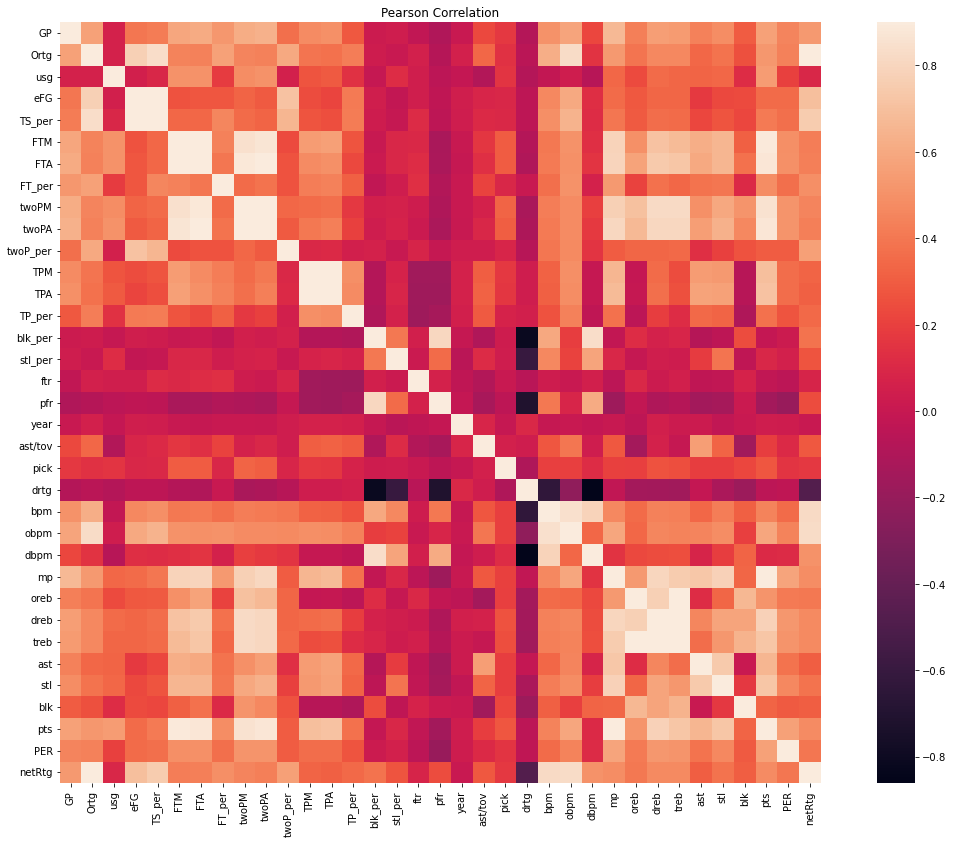

In [22]:
#constructing the heat map
plt.figure(figsize = (20,14))
sns.heatmap(data.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

<AxesSubplot:>

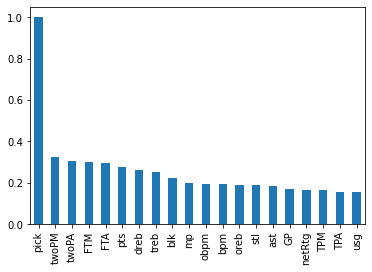

In [23]:
#sorting and displaying top correlations with pick as a bar graph
data.corr()['pick'].sort_values(ascending=False).head(20).plot.bar()

In [24]:
#the correlations from highest to lowest for pick
data.corr()['pick'].sort_values(ascending=False)

pick        1.000000
twoPM       0.326207
twoPA       0.304705
FTM         0.299833
FTA         0.296927
pts         0.274791
dreb        0.260931
treb        0.250890
blk         0.224654
mp          0.199045
obpm        0.193091
bpm         0.192251
oreb        0.191381
stl         0.190823
ast         0.184565
GP          0.169572
netRtg      0.166845
TPM         0.166201
TPA         0.157920
usg         0.156263
PER         0.150729
Ortg        0.140109
dbpm        0.116673
TS_per      0.101496
eFG         0.090623
FT_per      0.088800
twoP_per    0.086889
TP_per      0.073082
ast/tov     0.057844
stl_per     0.036210
blk_per     0.029026
ftr         0.011637
year       -0.007446
pfr        -0.036309
drtg       -0.100524
Name: pick, dtype: float64

To deem important correlations between stats and metrics, we used a correlation heat map. These correlations allowed us to choose the best attributes to train our data on. However, in order to use a proper mix of metrics and stats, an even amount of both were chosen, as a result of a bar graph visualization. twoPM had the highest correlation with pick at around 0.32

## Building Models

We will now build our three models using the following features: 'bpm',"PER", "netRtg", 'pts','mp','twoPM','FTM','TPM','treb','ast'. We selected these features by looking at the correlations in the heat map, and selecting at least 3 metrics for testing. The three highest metrics were bpm PER and netRtg. Furthermore, when looking a drafted player's profile, they tend to have high stats, dude to them always playing. Hence, mp is also an important feature as well. The models we will be building are Random Forest Classifier, Logistical Regression, and Support Vector Classification. We will tune the hyperparameters using GridSearchCV and display the classification report as well as use the score function to evaulate the accuracy of the model. We will also look at mean train and test score to check for overfitting.   

In [25]:
#divide the data into the input 'X' and the labels 'y'
X = data[['bpm',"PER", "netRtg", 'pts','mp','twoPM','FTM','TPM','treb','ast']]

y = data['pick']

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, #the observations
                                                    y, #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y
                                                    ) 

In [64]:
#creating the random forest classification 
#using gridSearchSV to tune hyper parameters 
#we will be tuning the n_estimators paramter 

cf = RandomForestClassifier()

params = {'n_estimators' : np.arange(80, 120)}

cf_grid = GridSearchCV(estimator = cf, param_grid = params, cv=3, return_train_score = True) 
cf_grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119])},
             return_train_score=True)

In [65]:
#best parameter and score 
print(cf_grid.best_params_)
print(cf_grid.best_score_)

{'n_estimators': 101}
0.9782102349945491


In [28]:
#construct a rfc using the n_estimators parameter and random_state 7 for reproducibility 
cf = RandomForestClassifier(n_estimators=104,random_state=7)
cf.fit(X_train, y_train)
y_pred = cf.predict(X_test)

In [29]:
#accuracy using score function 
print('The accuracy of the model is : {}'.format(cf.score(X_test,y_test)))

The accuracy of the model is : 0.9790111940298507


In [30]:
#classification report  
print(classification_report(y_test, y_pred, target_names = ["Not Drafted", "Drafted"]))

              precision    recall  f1-score   support

 Not Drafted       0.98      1.00      0.99      6260
     Drafted       0.73      0.34      0.47       172

    accuracy                           0.98      6432
   macro avg       0.86      0.67      0.73      6432
weighted avg       0.98      0.98      0.98      6432



The Random forest clasification model was able to classify if the player was drafted or not in the training data with a high accuracy. The accuracy score was good. The model is able to idenitfy not drafted with an accuracy of 0.98 and drafted with an accuracy of .73. This means that the model is much better at classifying correctly if a player is not drafted then if they are drafted. 

In [31]:
#display the cv results for the train and test set
cv_results = pd.DataFrame(cf_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
5,0.999967,0.000047,0.978277,0.001405
35,1.000000,0.000000,0.978277,0.000926
9,0.999967,0.000047,0.978210,0.000431
39,0.999967,0.000047,0.978077,0.000338
33,1.000000,0.000000,0.978010,0.000862


The highest mean train score is 1 and the highest mean test score is 0.97. There is a slight difference which could indicate that the model is slightly overfitting. 

In [32]:
from sklearn.inspection import permutation_importance
importances = permutation_importance(cf,X_test,y_test, random_state=7)


In [33]:
#looking at feature importance 
importances.importances_mean

array([ 6.84079602e-03,  9.01741294e-04,  1.18159204e-03,  9.01741294e-04,
        2.17661692e-04,  3.91791045e-03,  1.15049751e-03,  1.15049751e-03,
       -4.66417910e-04,  6.21890547e-05])

In [34]:
importance = importances.importances_mean
data_columns = X.columns


In [35]:
sort = np.argsort(importance)

In [36]:
#features in order of importance leaast to greatest 
data_columns[sort]

Index(['treb', 'ast', 'mp', 'pts', 'PER', 'FTM', 'TPM', 'netRtg', 'twoPM',
       'bpm'],
      dtype='object')

<AxesSubplot:xlabel='feature'>

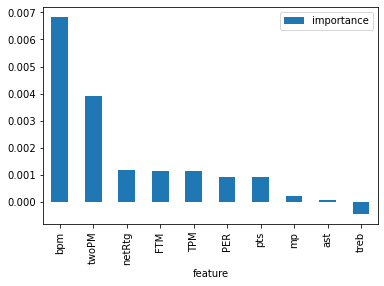

In [37]:
#graphing the importances of the features 
d = {'importance': importance, 'feature': data_columns}
importance_df = pd.DataFrame(data=d)
importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False).plot.bar()

In [38]:
#importances 
importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)

,importance
feature,
bpm,0.006841
twoPM,0.003918
netRtg,0.001182
FTM,0.001150
TPM,0.001150
PER,0.000902
pts,0.000902
mp,0.000218
ast,0.000062


The most important features seem to bpm towpm and netRTG. The least important are Ast and Treb. 

In [39]:
#Building the Logistical Regression Model
lr = LogisticRegression()
params = {'C' : np.arange(0.1, 5,0.1)}



In [40]:
#using gridsearch to tune C
lr_grid = GridSearchCV(estimator = lr, param_grid = params, cv=3, return_train_score = True) 
lr_grid.fit(X_train, y_train)

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])},
             return_train_score=True)

In [41]:
#best C value and best score
print(lr_grid.best_params_)
print(lr_grid.best_score_)

{'C': 3.9000000000000004}
0.9749450742722433


In [42]:
#buidling the LR model with 3.9 C value and random_state 7 for reproducibility
lr = LogisticRegression(C=3.9,random_state=7)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
#evaluating the accuracy with score function 
print('The accuracy of the model is : {}'.format(lr.score(X_test,y_test)))

The accuracy of the model is : 0.9755907960199005


In [44]:
#displaying the classification report 
print(classification_report(y_test, y_pred, target_names = ["Not Drafted", "Drafted"]))

              precision    recall  f1-score   support

 Not Drafted       0.98      1.00      0.99      6260
     Drafted       0.64      0.20      0.31       172

    accuracy                           0.98      6432
   macro avg       0.81      0.60      0.65      6432
weighted avg       0.97      0.98      0.97      6432



The Logistical Regression model predicts the classifaction of drafting with a high accuracy. Once again the not drafted score is higher than the drafted meaning that this model is better at classifying a player who was not drafted than it is at classifying a player that was drafted. 

In [45]:
#display the cv results for the train and test set
cv_results = pd.DataFrame(lr_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
38,0.974778,0.000524,0.974945,0.000571
22,0.974878,0.001064,0.974945,0.000247
19,0.974778,0.000836,0.974878,0.000997
2,0.974245,0.000902,0.974878,0.001062
15,0.974512,0.000667,0.974812,0.001177


The highest mean train score was 0.97 and so was the highest mean test score. There is not much of a difference between the two indicating neither overfitting or underfitting. The model is able to accuratly predict the classification. 

In [46]:
#buidling the SVM Classification model 
svm = SVC()

In [47]:
params = {'C': np.arange(0.2, 3,0.2)}
#hypertuning the c value using GridSearchCV
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=3, return_train_score = True) 
svm_grid.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6,
       2.8])},
             return_train_score=True)

In [48]:
#Best C value and score 
print(svm_grid.best_params_)
print(svm_grid.best_score_)

{'C': 2.2}
0.9754115143868497


In [49]:
#bulding the SVM model with C Value of 2.2 
svm = SVC(C=2.2,random_state=7)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled = scaler.transform(X_train) #scale the training data

svm.fit(X_train_Scaled, y_train) #fit the data
X_test_Scaled = scaler.transform(X_test) # scale the test data 

y_pred = svm.predict(X_test)
#getting accuracy of model using score function 
print('The accuracy of the model is: {}'.format(svm.score(X_test_Scaled, y_test)))

/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The accuracy of the model is: 0.9785447761194029


In [50]:
#displaying the classifaction report 
target_names = ['Not Drafted', 'Drafted']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

 Not Drafted       0.97      1.00      0.99      6260
     Drafted       0.00      0.00      0.00       172

    accuracy                           0.97      6432
   macro avg       0.49      0.50      0.49      6432
weighted avg       0.95      0.97      0.96      6432



/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model is able to predicting the overall draft classifiction with a high accuracy. However is not able to predict the if a player is drafted accuratly 

In [51]:
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
10,0.976811,0.000142,0.975412,0.000587
11,0.976844,0.000170,0.975345,0.000497
12,0.976977,0.000124,0.975345,0.000338
13,0.977111,0.000216,0.975278,0.000409
9,0.976678,0.000170,0.975212,0.000488


The highest mean train score and highest mean test score are both close to eachother indicating neither overfittnig or underfitting.

## Testing our models with 2020 and 2021 data
We also wanted to see how our models would perform on a standard draft class so we tested our model on data from the years of 2020 and 2021. 

In [52]:
X_test = data_Testing[['bpm',"PER", "netRtg", 'pts','mp','twoPM','FTM','TPM','treb','ast']]
y_test = data_Testing['pick']


In [53]:
#testing the random forest classifier 
y_pred = cf.predict(X_test)

In [54]:
print('The accuracy of the model is : {}'.format(cf.score(X_test,y_test)))


The accuracy of the model is : 0.9872118959107806


In [55]:
print(classification_report(y_test, y_pred, target_names = ["Not Drafted", "Drafted"]))

              precision    recall  f1-score   support

 Not Drafted       0.99      1.00      0.99      6626
     Drafted       0.72      0.21      0.33        99

    accuracy                           0.99      6725
   macro avg       0.86      0.61      0.66      6725
weighted avg       0.98      0.99      0.98      6725



The random forest classifier model is able to accurately classify the draft for the 2020 and 2021 data. It still classifies players who got didn't get drafted more accurately than players who got drafted. 

In [56]:
#testing the logistical regression model 
y_pred = lr.predict(X_test)

In [57]:
print('The accuracy of the model is : {}'.format(lr.score(X_test,y_test)))


The accuracy of the model is : 0.9846840148698884


In [58]:
print(classification_report(y_test, y_pred, target_names = ["Not Drafted", "Drafted"]))

              precision    recall  f1-score   support

 Not Drafted       0.99      1.00      0.99      6626
     Drafted       0.36      0.05      0.09        99

    accuracy                           0.98      6725
   macro avg       0.67      0.52      0.54      6725
weighted avg       0.98      0.98      0.98      6725



The logistical regression model is able to accurately classify the draft for the 2020 and 2021 data. It still classifies players who got didn't get drafted more accurately than players who got drafted, but the drafted category is much less accurate.

In [59]:
#testing the svm model 
X_test_Scaled = scaler.transform(X_test)
y_pred = svm.predict(X_test_Scaled)

In [60]:
print('The accuracy of the model is : {}'.format(svm.score(X_test,y_test)))


/Users/vidyut/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The accuracy of the model is : 0.985278810408922


In [61]:
print(classification_report(y_test, y_pred, target_names = ["Not Drafted", "Drafted"]))

              precision    recall  f1-score   support

 Not Drafted       0.99      1.00      0.99      6626
     Drafted       0.67      0.06      0.11        99

    accuracy                           0.99      6725
   macro avg       0.83      0.53      0.55      6725
weighted avg       0.98      0.99      0.98      6725



The Support Vector Classification model is able to accurately classify the draft for the 2020 and 2021 data. It classifies players who got didn't get drafted more accurately than players who got drafted, but perfoms much better than it did in the training with the new data. 

## Results and Evaluation
### Random Assortment Testing Results
We trained our models using 10 features, bpm, PER, netRtg, pts, mp, twoPM, FTM, TPM, treb, ast. For our initial train test split, the Random Forest Classification model performed the best with an accuracy score of 0.98. It was able to predict the not drafted players with 0.98 precision and the drafted with 0.73 precision. Then the Logistical Regression model had an accuracy of 0.98 and a precision of 0.98 for not drafted players, but it had a lower precision of 0.64 for drafted players. Finally the SVC model had an accuracy of 0.98 and a precision of 0.97 for not drafted players, but it had a precision of 0 for drafted payers, meaning it was not accurate in classifying drafted players. Overall, all the models were very accurate, however they were also all more precise in classifying not drafted players than drafted players. This did not skew the overall accuracy of the model because there are much more players that are not drafted so that category carries more weight.

### Standard Draft Class Testing Results
We also wanted to see how our models would perform on a standard draft class so we tested our model on data from the years of 2020 and 2021. The models performed similarly in accuracy as before, but the precision for drafted and not drafted players was different. The Random Forest model’s performance did not change. The Logistical Regression model decreased in drafted player precision to 0.36 and the Support Vector model increased to 0.67 for drafted precision. The models were still able to perform well overall with the new data but there was some variation in the performance. This can be attributed to variations in the data. Since a only a small portion of players actually get drafted, the precision is more likely to be skewed by incorrect classifications. The players not drafted on the other hand are much greater in number and this the precious stays consistent. 

We concluded that the Random Forrest model was the best for predicting the classifications of players as it had the highest performance overall. 

### Evaluation
We derived to feature importance from the model using the permutation importance function. The importance of the features are graphed below with BPM being the most important. These results demonstrate that metrics are essential for players wanting to be drafted, and it is not the pure on-court stats, but rather the unseen effect of a player on the court that accurately details whether a player is drafted or not. However, it also clear that scoring is still highly regarded among NBA teams, as baskets made are all ranked above other measures offense such assists.
